<a href="https://colab.research.google.com/github/Afqufai/MachineLearning2025_03/blob/main/TI_3G_03_Afrizal_Qurratul_Faizin_Kuis_1_JS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pada `workclass`, `occupation`, dan `native-country` memiliki jumlah yang berbeda dari variabel lain. Gunakan fungsi `isnull`, lalu jumlah total.

In [ ]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Karena ketiga variabel semua berupa non-angka...
df['workclass'].fillna(value='Private', inplace = True)
df['occupation'].fillna(value=df['occupation'].mode, inplace = True)
df['native-country'].fillna(value='United-States', inplace = True)

df.isnull().sum()

/tmp/ipython-input-1049333231.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value='Private', inplace = True)
/tmp/ipython-input-1049333231.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
print(df[df.duplicated()])

       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3677

Data Kualitatif:
- Workclass
- Education
- Marital Status
- Occupation
- Relationship
- Race
- Sex
- Native Country
- Income

In [ ]:
# Ada salah tulis di titik bagian <=50K dan sebaliknya
df['income'] = df['income'].str.replace('.', '')
df['native-country'] = df['native-country'].str.replace('?', 'United-States')


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

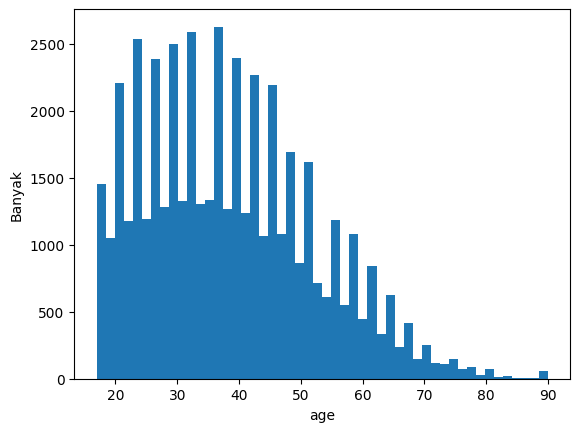

In [ ]:
# Jawab 1.1 - Histrogram
agecols = ['age']
for col in agecols:
  plt.figure()
  plt.hist(df[col], bins = 50)
  plt.xlabel(col); plt.ylabel('Banyak')
  plt.show()

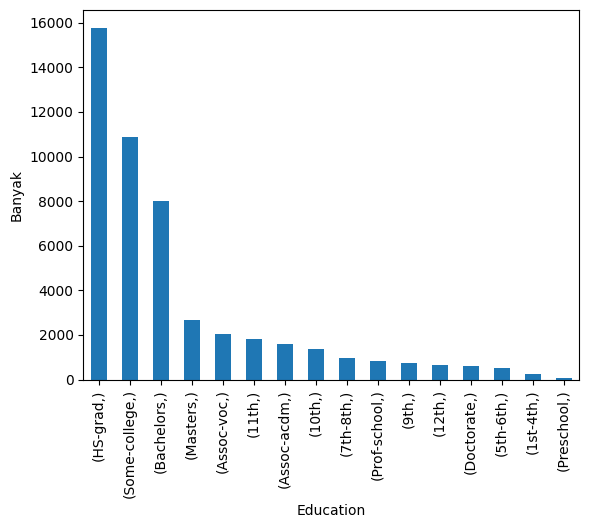

In [ ]:
# Jawab 1.2 - Barchart
educols = ['education']
df[educols].value_counts(dropna = False).plot(kind = 'bar')

plt.xlabel('Education'); plt.ylabel('Banyak')
plt.show()

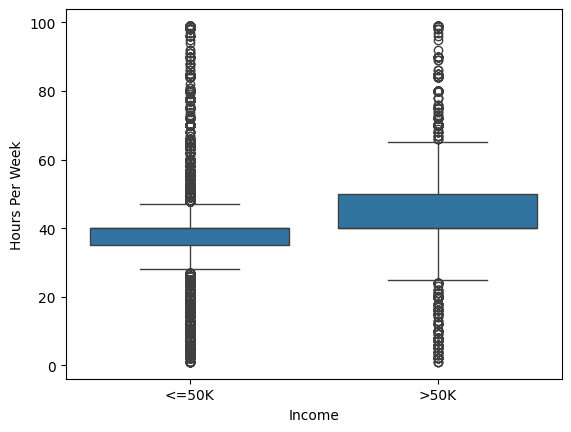

In [ ]:
# Jawab 1.3 - Boxplot
sns.boxplot(data = df, x = 'income', y = 'hours-per-week')
plt.xlabel('Income'); plt.ylabel('Hours Per Week')
plt.show()

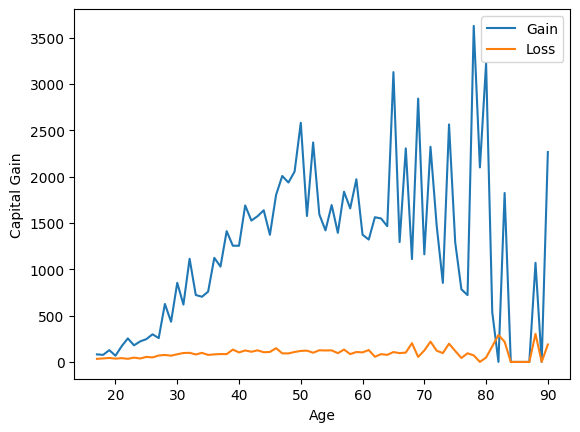

In [ ]:
# Jawab 1.4 - Lineplot
sns.lineplot(data = df, x = 'age', y = 'capital-gain', errorbar = None, label = 'Gain')
sns.lineplot(data = df, x = 'age', y = 'capital-loss', errorbar = None, label = 'Loss')

plt.xlabel('Age'); plt.ylabel('Capital Gain')
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. Pada distribusi data 'age', distribusi yang ada pada 'age'
adalah lebih banyak orang yang lebih muda dengan orang yang mengisi data
paling banyak berada di usia 30an mendekati 40an karena data ini bersifat
"right-skewed" atau condong ke kanan.

2. Jika ada data age yang hilang, yang akan saya lakukan adalah menggunakan
imputasi mean (rata rata) atau menggunakan random sample. Ini dikarenakan
menggunakan mean akan mencari nilai tengah dari keseluruhan data, dan jika
menggunakan random sample, harus mencari nilai minimal dan maksimal dan
membuat looping RNG untuk mengisi nilai kosong dengan nilai acak. Kedua metode
saya ambil karena mudah dan cepat dan juga karena 'age' menggunakan nilai
numerik.

3. Secara visual, kategori dengan income '>50K' memiliki outlier pada bagian
atas kotak dan adanya beberapa lingakaran/data pada gap/celah pada boxplot di atas
Secara matematis, jika dicari, maka kategori '<=50K' memiliki outlier yang
paling banyak dengan jumlah 11706 jika dibandingkan dengan >50K yang memiliki
781 outlier
'''

'\n1. Pada distribusi data \'age\', distribusi yang ada pada \'age\'\nadalah lebih banyak orang yang lebih muda dengan orang yang mengisi data\npaling banyak berada di usia 30an mendekati 40an karena data ini bersifat\n"right-skewed" atau condong ke kanan.\n\n2. Jika ada data age yang hilang, yang akan saya lakukan adalah menggunakan\nimputasi mean (rata rata) atau menggunakan random sample. Ini dikarenakan\nmenggunakan mean akan mencari nilai tengah dari keseluruhan data, dan jika\nmenggunakan random sample, harus mencari nilai minimal dan maksimal dan\nmembuat looping RNG untuk mengisi nilai kosong dengan nilai acak. Kedua metode\nsaya ambil karena mudah dan cepat dan juga karena \'age\' menggunakan nilai\nnumerik.\n\n3. Secara visual, kategori dengan income \'>50K\' memiliki outlier pada bagian\natas kotak dan adanya beberapa lingakaran/data pada gap/celah pada boxplot di atas\nSecara matematis, jika dicari, maka kategori \'<=50K\' memiliki outlier yang\npaling banyak dengan jumlah 

In [ ]:
# find outlier
for kat in df['income'].unique():
  print(kat)
  q1 = df[df['income'] == kat]['hours-per-week'].quantile(0.25)
  q3 = df[df['income'] == kat]['hours-per-week'].quantile(0.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  outliercount = 0
  for val in df[df['income'] == kat]['hours-per-week']:
    if val < lower or val > upper:
      outliercount += 1

  print(outliercount)

<=50K
11706
>50K
781


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Encode
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex  \
0       Never-married       Adm-clerical  Not-in-family  White    1   
1  Married-civ-spouse    Exec-managerial        Husband  White    1   
2            Divorced  Handlers-cleaners  Not-in-family  White    1   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    1   
4  Married-civ-spouse     Prof-specialty           Wife  Black    0   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-Stat

# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

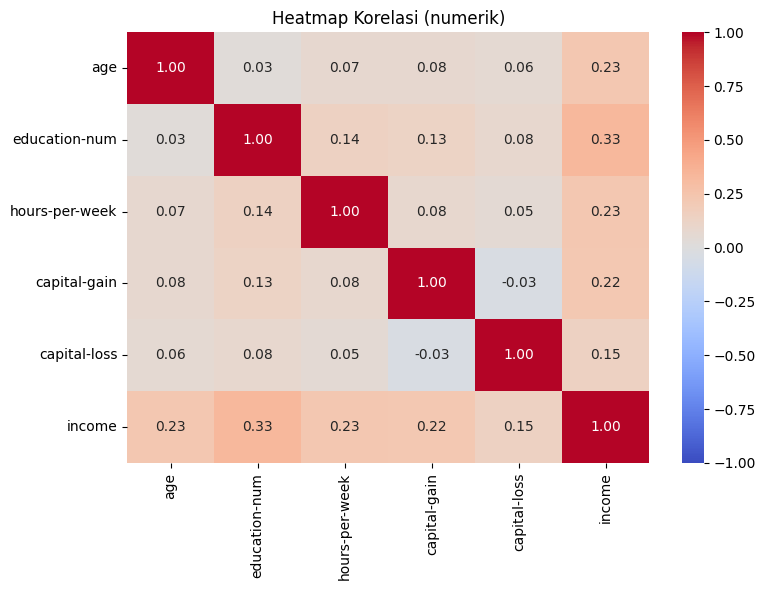

In [ ]:
# Analisis Korelasi
npNum = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
npNum = df[npNum]
corr = npNum.corr(numeric_only= True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
Pada hasil analisis pada heatmap korelasi diatas, jika sama, maka akan selalu
memiliki korelasi tertinggi, seperti age dengan age. Pada data juga korelasi
education-num, yang kemungkinan adalah tingkat pendidikan memiliki korelasi
tertinggi dengan income dari masing-masing orang, sedangkan korelasi terendah
adalah capital-gain dengan capital-loss karena tidak ada korelasinya.
Pada umumnya, semua korelasi disini bersifat lemah atau sedikit.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


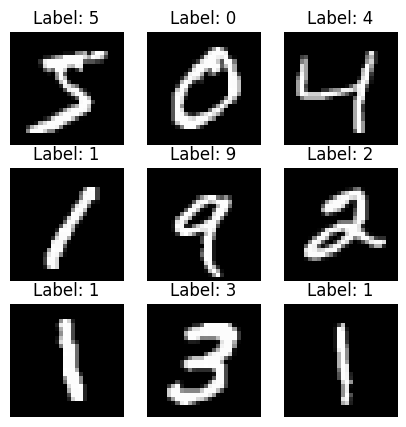

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
import cv2 as cv

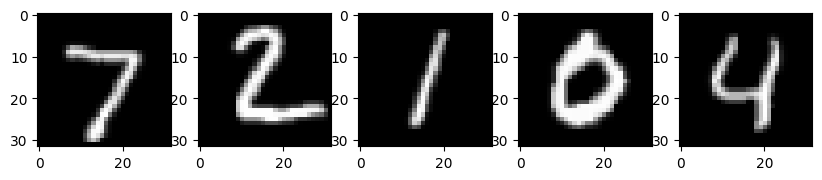

In [ ]:
# Jawab Soal 1
(X_train, y_train), (X_test, y_test) = mnist.load_data()

newimg = (32, 32)
x32img = np.zeros((X_test.shape[0], newimg[0], newimg[1]))

for i in range(X_test.shape[0]):
  resized = cv.resize(X_test[i], newimg, x32img[i])
  x32img[i] = resized

# Keluarkan
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x32img[i], cmap="gray")

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai Minimal sebelum vs Sesudah
0.0
0.0
Nilai Maximal sebelum vs Sesudah
255.0
1.0


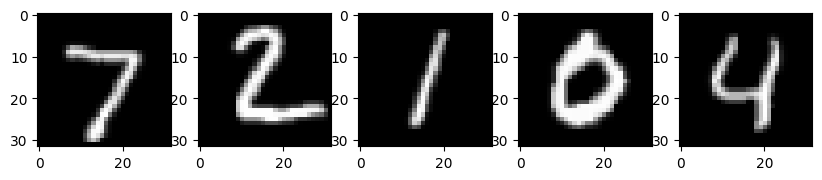

In [ ]:
x32img_normal = x32img.astype('float32') # Cegah overflow
x32img_normal = x32img_normal / 255.0

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x32img_normal[i], cmap="gray")

print("Nilai Minimal sebelum vs Sesudah")
print(x32img.min())
print(x32img_normal.min())

print("Nilai Maximal sebelum vs Sesudah")
print(x32img.max())
print(x32img_normal.max())

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Flatten ke 1 dim
flat1d = x32img_normal.shape[0]
size = 32 * 32
kosongan = np.zeros((flat1d, size))

for i in range(flat1d):
  img = x32img_normal[i]
  kosongan[i] = img.flatten()


print("Shape akhir: " + str(x32img_normal.shape))
print("Shape akhir: " + str(kosongan.shape))

Shape akhir: (10000, 32, 32)
Shape akhir: (10000, 1024)
